In [1]:
from numpy import pi
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit_textbook.tools import array_to_latex


In [2]:
def add_qft_rotations(qc, n):
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(pi/2**(n-qubit), qubit, n)
    add_qft_rotations(qc, n)

def add_qft_swaps(qc, n):
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    return qc

def make_qft(n):
    qc = QuantumCircuit(n)
    add_qft_rotations(qc, n)
    add_qft_swaps(qc, n)
    return qc

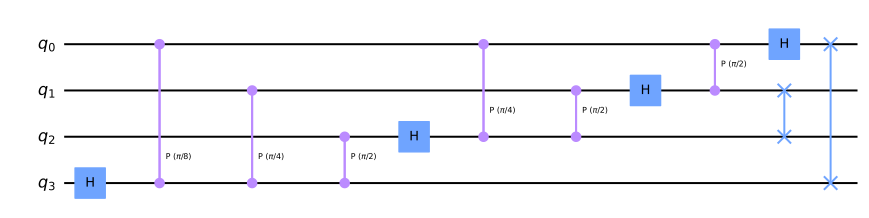

In [3]:
qc = make_qft(4)
qc.draw()

In [4]:
def apply_qft(n, value):
    bin_value = bin(value)[2:].zfill(n)
    qc = QuantumCircuit(n)
    qc.initialize(bin_value, qc.qubits)
    qft = make_qft(n)
    qc = qc.compose(qft)
    display(qc.draw())
    sim = Aer.get_backend("aer_simulator")
    qc.save_statevector()
    statevector = sim.run(qc).result().get_statevector()
    display(plot_bloch_multivector(statevector))
    array_to_latex(statevector, pretext="\\text{Statevector} = ")
    return statevector


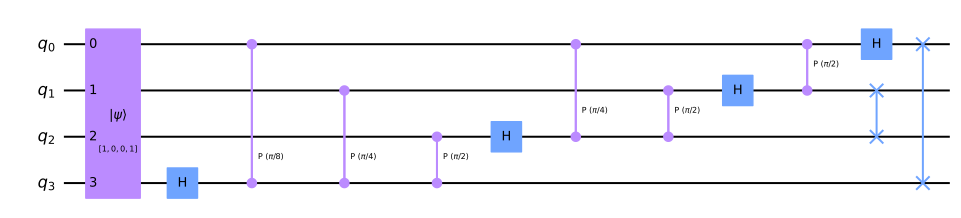

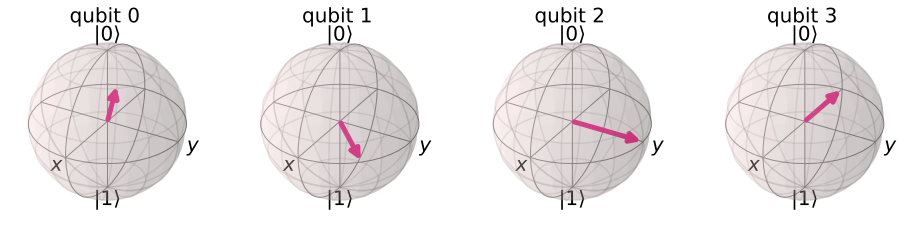

<IPython.core.display.Math object>

Statevector([ 2.50000000e-01-6.12323400e-17j,
             -2.30969883e-01-9.56708581e-02j,
              1.76776695e-01+1.76776695e-01j,
             -9.56708581e-02-2.30969883e-01j,
              7.65404249e-17+2.50000000e-01j,
              9.56708581e-02-2.30969883e-01j,
             -1.76776695e-01+1.76776695e-01j,
              2.30969883e-01-9.56708581e-02j,
             -2.50000000e-01+6.12323400e-17j,
              2.30969883e-01+9.56708581e-02j,
             -1.76776695e-01-1.76776695e-01j,
              9.56708581e-02+2.30969883e-01j,
             -7.65404249e-17-2.50000000e-01j,
             -9.56708581e-02+2.30969883e-01j,
              1.76776695e-01-1.76776695e-01j,
             -2.30969883e-01+9.56708581e-02j],
            dims=(2, 2, 2, 2))


In [5]:
statevector = apply_qft(4, 9)
print(statevector)